In [1]:
from keras.datasets import boston_housing

Using TensorFlow backend.
C:\Python\anacoda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Python\anacoda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Python\anacoda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Python\anacoda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Pas

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

train_data.shape

57344/57026 [==============================] - 2s 39us/step


(404, 13)

In [3]:
train_data -= train_data.mean(axis=0)
train_data /= train_data.std(axis=0)

test_data -= test_data.mean(axis=0)
test_data /= test_data.std(axis=0)

In [4]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model



In [5]:
#### As we don;t have a lot of data so K-fold variation

import numpy as np

k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print("proccessing fold #", i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

proccessing fold # 0
proccessing fold # 1
proccessing fold # 2
proccessing fold # 3


In [6]:
print(all_scores)

[2.2725934982299805, 2.922422409057617, 2.5916428565979004, 2.4191038608551025]


In [7]:
print(np.mean(all_scores))

2.55144065618515


In [10]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, 
                        partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, 
                        batch_size=1, verbose=0)
    print(history.history.keys())
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])
processing fold # 1
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])
processing fold # 2
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])
processing fold # 3
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


In [11]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

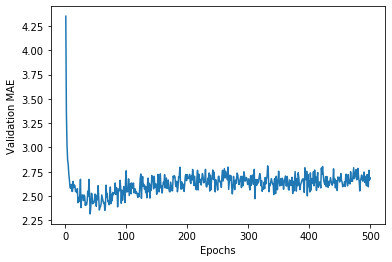

In [12]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

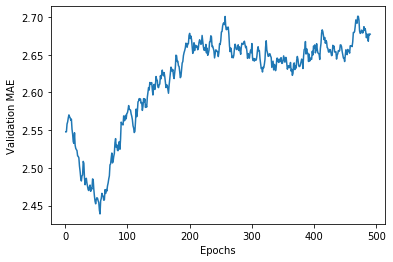

In [13]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [15]:
model = build_model()
model.fit(train_data, train_targets,epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 157us/step


In [16]:
print(test_mae_score)

2.9452617168426514
